In [1]:
!pip install pandas

In [34]:
import pandas as pd
df = pd.read_csv(r"C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\raw_data\export-jsps001-1h.csv")  # เปลี่ยนเป็นชื่อไฟล์จริง
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.drop(columns=['timezone'], inplace=True)
df.drop(columns=['pm_2_5_sp'], inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

# โหลดข้อมูล (สมมติว่ามีคอลัมน์ 'timestamp')
df['timestamp'] = pd.to_datetime(df['timestamp'])  # แปลงเป็น datetime
df['date'] = df['timestamp'].dt.date  # ดึงเฉพาะวันที่

# นับจำนวนแถวต่อวัน
count_per_day = df.groupby('date')['timestamp'].count()

# คัดกรองเฉพาะวันที่มีครบ 24 ชั่วโมง
valid_days = count_per_day[count_per_day == 24].index

# ลบวันที่ไม่ครบ 24 ชั่วโมง
df_cleaned = df[df['date'].isin(valid_days)].drop(columns=['date'])


df = df_cleaned
df

,timestamp,humidity,pm_2_5,temperature
45,2021-08-18 00:00:00,82.810924,6.478261,27.261345
46,2021-08-18 01:00:00,84.977966,14.271186,26.650000
47,2021-08-18 02:00:00,84.600000,32.308333,26.710924
48,2021-08-18 03:00:00,85.113559,29.743590,26.647458
49,2021-08-18 04:00:00,85.430833,38.931034,26.551667
...,...,...,...,...
27531,2025-02-10 19:00:00,69.219469,27.588235,28.891425
27532,2025-02-10 20:00:00,70.651656,26.825000,28.379455
27533,2025-02-10 21:00:00,71.649910,25.441667,27.974364
27534,2025-02-10 22:00:00,71.973936,26.056075,27.943536


<Axes: >

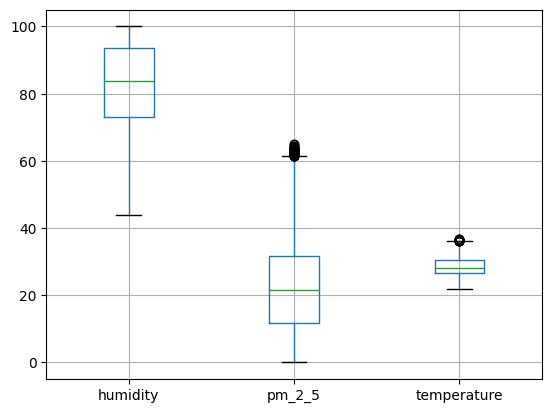

In [39]:
df.boxplot()

In [35]:
import numpy as np
from sklearn.ensemble import IsolationForest
features = ["pm_2_5", "humidity", "temperature"]
df_subset = df[features]
# ใช้ Isolation Forest ตรวจจับ Outlier
iso = IsolationForest(contamination=0.05, random_state=42)
outlier_pred = iso.fit_predict(df_subset)
# ตำแหน่งที่เป็น Outlier จะมีค่า -1
df["outlier"] = outlier_pred
# แทนที่ Outlier ด้วยค่ามัธยฐานของคอลัมน์นั้น
for col in features:
    median_value = df[col].median()
    df.loc[df["outlier"] == -1, col] = median_value

df.drop(columns=["outlier"], inplace=True)
df

,timestamp,humidity,pm_2_5,temperature
45,2021-08-18 00:00:00,82.810924,6.478261,27.261345
46,2021-08-18 01:00:00,84.977966,14.271186,26.650000
47,2021-08-18 02:00:00,84.600000,32.308333,26.710924
48,2021-08-18 03:00:00,85.113559,29.743590,26.647458
49,2021-08-18 04:00:00,85.430833,38.931034,26.551667
...,...,...,...,...
27531,2025-02-10 19:00:00,69.219469,27.588235,28.891425
27532,2025-02-10 20:00:00,70.651656,26.825000,28.379455
27533,2025-02-10 21:00:00,71.649910,25.441667,27.974364
27534,2025-02-10 22:00:00,71.973936,26.056075,27.943536


In [36]:

df_cleaned = df_cleaned.iloc[:-168]  # ลบแถวท้าย N แถว
df_cleaned.to_csv(r"C:\Users\ASUS\Desktop\projectforecastpm2_5\dataforecast\last_test.csv", index=False)
df_cleaned

,timestamp,humidity,pm_2_5,temperature
45,2021-08-18 00:00:00,82.810924,6.478261,27.261345
46,2021-08-18 01:00:00,84.977966,14.271186,26.650000
47,2021-08-18 02:00:00,84.600000,32.308333,26.710924
48,2021-08-18 03:00:00,85.113559,29.743590,26.647458
49,2021-08-18 04:00:00,85.430833,38.931034,26.551667
...,...,...,...,...
27363,2025-02-03 19:00:00,70.578723,28.591667,29.206171
27364,2025-02-03 20:00:00,69.189982,29.714286,28.579493
27365,2025-02-03 21:00:00,72.229974,22.954545,27.387404
27366,2025-02-03 22:00:00,74.487035,21.478992,26.806460
